In [395]:
import glob
import scipy
import uproot as up
import matplotlib.pyplot as plt
import awkward as ak
import numpy as np
import time
import pandas as pd
#import Pool
from multiprocessing import Pool
from scipy.stats import zscore
from sklearn import metrics

In [401]:
bi214 = pd.read_csv('bi214_data.csv')
po214 = pd.read_csv('po214_data.csv')
cf252 = pd.read_csv('cf252_data.csv')
na22 = pd.read_csv('na22_data.csv')

bi214.name = 'bi214'
po214.name = 'po214'
cf252.name = 'cf252'
na22.name = 'na22'

In [397]:


bi214 = bi214.drop(bi214[bi214.coincidence < 5].index)
po214 = po214.drop(po214[po214.coincidence < 5].index)
cf252 = cf252.drop(cf252[cf252.coincidence < 5].index)
na22 = na22.drop(na22[na22.coincidence < 5].index)

bi214 = bi214.reset_index()
po214 = po214.reset_index()
cf252 = cf252.reset_index()
na22 = na22.reset_index()

bi214 = bi214.drop(bi214[bi214.index > 16022].index)
po214 = po214.drop(po214[po214.index > 16022].index)
cf252 = cf252.drop(cf252[cf252.index > 16022].index)
na22 = na22.drop(na22[na22.index > 16022].index)

In [398]:

b = pd.concat([bi214,po214,cf252,na22])
b = b[b.Tag.isin(dropvalues) == False]
display(b)

,index,Unnamed: 0,pulseArea_phd,coincidence,areaFractionTime50_ns,areaFractionTime75_ns,areaFractionTime90_ns,pulseStartTime_ns,pulseEndTime_ns,peakAmp,peakTime_ns,af50pa,af75pa,af90pa,pulselength,Tag
0,0,0,102.593048,72,100,150,200,1020,1380,0.895763,70,0.974725,1.462087,1.949450,360,po214
1,1,1,74.365265,57,110,160,220,1020,1410,0.604991,70,1.479185,2.151542,2.958370,390,po214
2,2,2,76.224464,58,100,150,190,1020,1410,0.602901,60,1.311915,1.967872,2.492638,390,po214
3,3,3,78.855057,57,110,160,200,1020,1370,0.686464,60,1.394964,2.029039,2.536299,350,po214
4,4,4,110.168343,78,110,160,230,1020,1420,0.894787,80,0.998472,1.452323,2.087714,400,po214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16017,17086,17086,28.196896,30,100,150,200,70,390,0.264834,80,3.546490,5.319735,7.092979,320,na22
16018,17087,17087,79.324303,63,100,140,200,60,440,0.673138,80,1.260648,1.764907,2.521295,380,na22
16019,17088,17088,25.329342,23,90,140,210,60,390,0.270818,80,3.553191,5.527187,8.290780,330,na22
16020,17089,17089,15.605631,15,80,110,150,70,330,0.165414,50,5.126355,7.048738,9.611915,260,na22


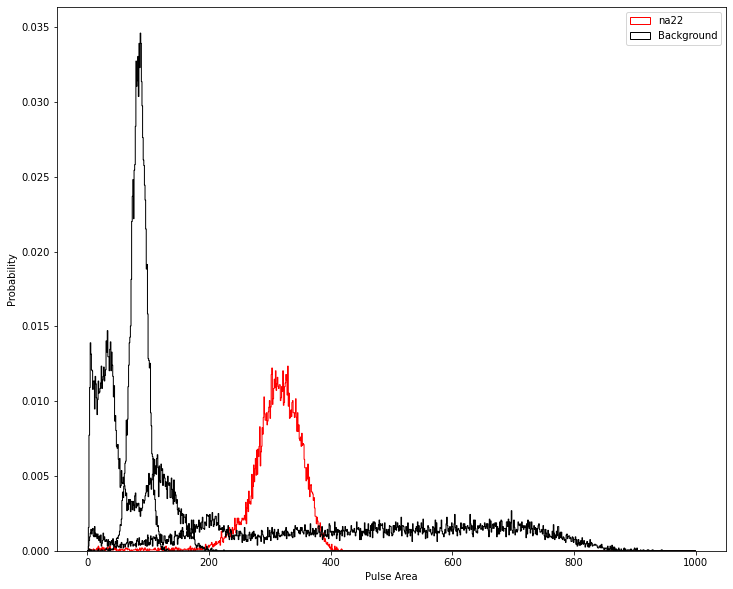

In [399]:

bins = np.linspace(0,1000,1000)


fig, ax = plt.subplots(figsize=(12,10))
'''
signal = np.histogram(bi214.pulseArea_phd, bins, density=True)
signal = ax.hist(bi214.pulseArea_phd, bins, label='na22', color='r', histtype = 'step',density = True)
#background = ax.hist(background.pulseArea_phd, bins, label='Background', color='k', histtype = 'step',density = True)

b1 = np.histogram(po214.pulseArea_phd, bins, density=True)
b2 = np.histogram(cf252.pulseArea_phd, bins, density=True)
b3 = np.histogram(na22.pulseArea_phd, bins, density=True)'''

signal = ax.hist(bi214.pulseArea_phd, bins, label='na22', color='r', histtype = 'step',density = True)
b1 = ax.hist(na22.pulseArea_phd, bins, label='Background', color='k', histtype = 'step',density = True)
b2 = ax.hist(po214.pulseArea_phd, bins, color='k', histtype = 'step',density = True)
b3 = ax.hist(cf252.pulseArea_phd, bins, color='k', histtype = 'step',density = True)
ax.set_xlabel('Pulse Area')
ax.set_ylabel('Probability')

plt.legend()
plt.show()

In [408]:
#Inputs: data to get PDE from
#Outputs; Graph of PDE

def PDE(decaytype,color='r'):
    bins = np.linspace(0,1000,1000)
    background = pd.concat([bi214,po214,cf252,na22])
    signal = np.histogram(decaytype.pulseArea_phd, bins, density=True)
    dropvalues = ['{}'.format(decaytype.name)]
    background = background[background.Tag.isin(dropvalues) == False]
    background = np.histogram(background.pulseArea_phd,bins, density=True)
    
    L = signal[0]/(signal[0] + background[0])
    centre = [ (y+x)/2 for x, y in zip(signal[1],signal[1][1:]) ] 
    
    return L,centre 
    
    
L_bi214, centre = PDE(bi214)
L_po214, centre = PDE(po214)
L_cf252, centre = PDE(cf252)
L_na22, centre = PDE(na22)


    
    


/tmp/ipykernel_928488/1245871628.py:12: RuntimeWarning: invalid value encountered in true_divide
  L = signal[0]/(signal[0] + background[0])


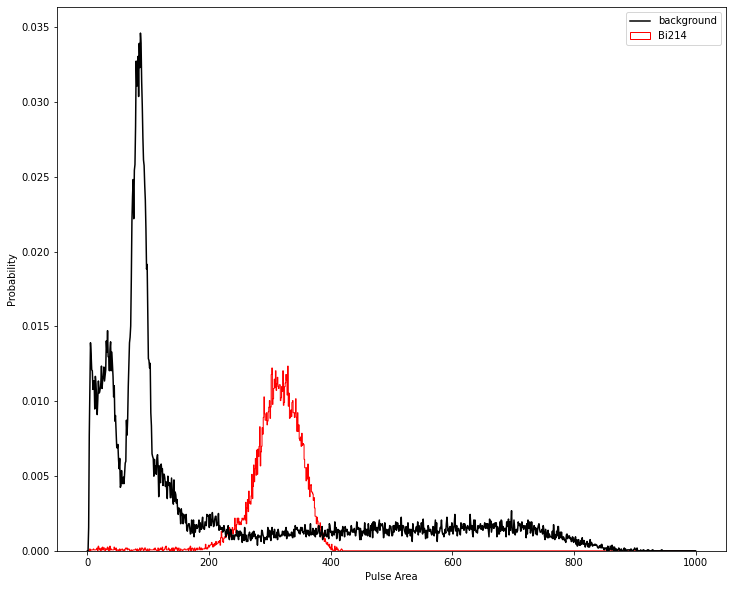

In [301]:


background = zip(b1[0],b2[0],b3[0])


    
back = prob(background)
centre = [ (y+x)/2 for x, y in zip(signal[1],signal[1][1:]) ] 

fig, ax = plt.subplots(figsize=(12,10))

signal = ax.hist(bi214.pulseArea_phd, bins, label='Bi214', color='r', histtype = 'step',density = True)
ax.plot(centre,back,color ='k',label='background')

ax.set_xlabel('Pulse Area')
ax.set_ylabel('Probability')


plt.legend()
plt.show()

In [302]:
L = signal[0]/(signal[0] + back)



/tmp/ipykernel_928488/3752268659.py:1: RuntimeWarning: invalid value encountered in true_divide
  L = signal[0]/(signal[0] + back)


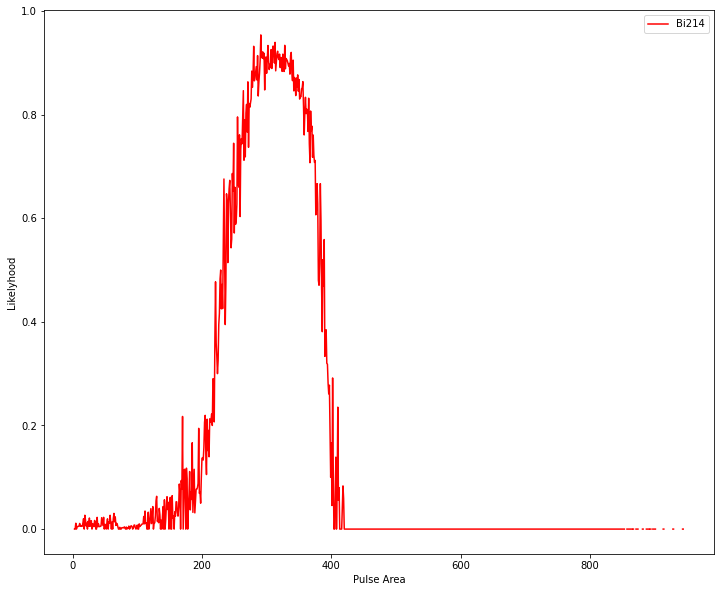

In [303]:
fig, ax = plt.subplots(figsize=(12,10))
ax.plot(centre,L,color = 'r',label='Bi214')


ax.set_xlabel('Pulse Area')
ax.set_ylabel('Likelyhood')
plt.legend()
plt.show()